In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os

persistent_errors = {} # Will contain different model names as keys and combined errors along with bin centers as values

# Without translational invariance training

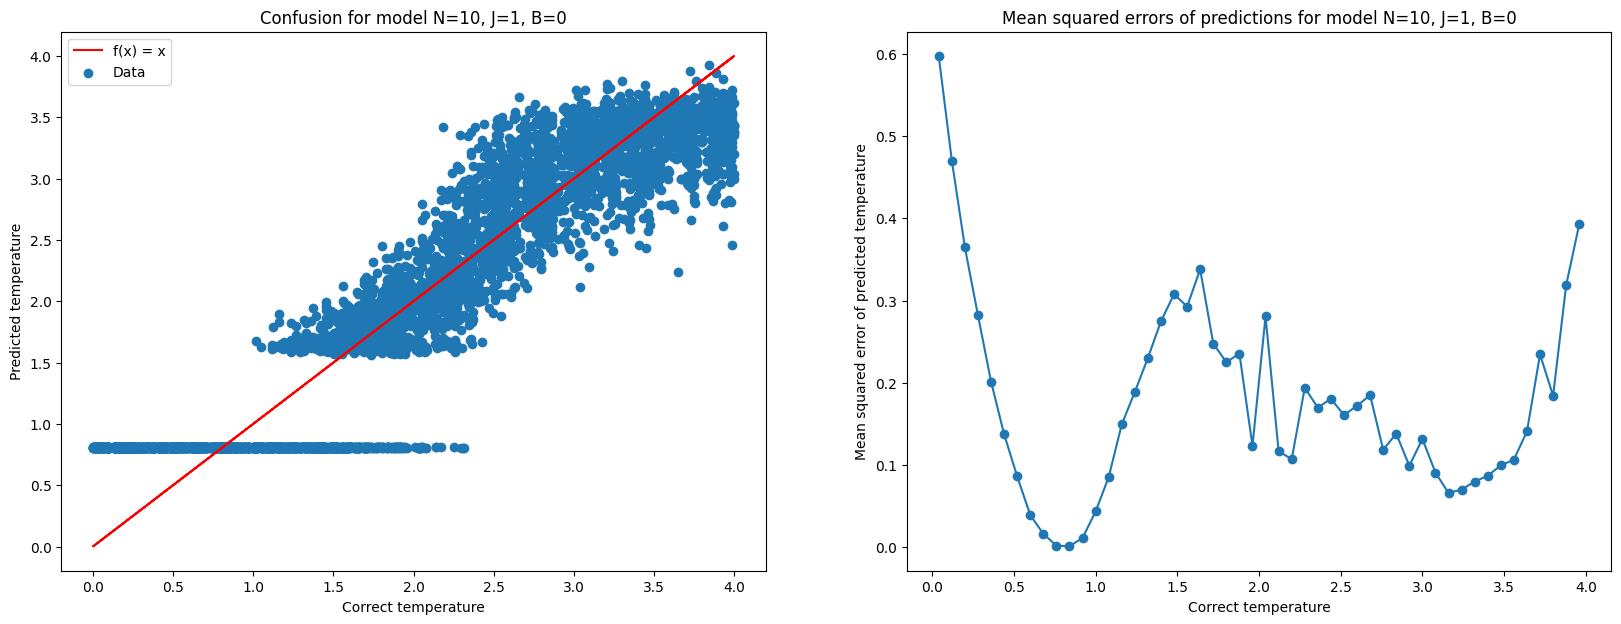

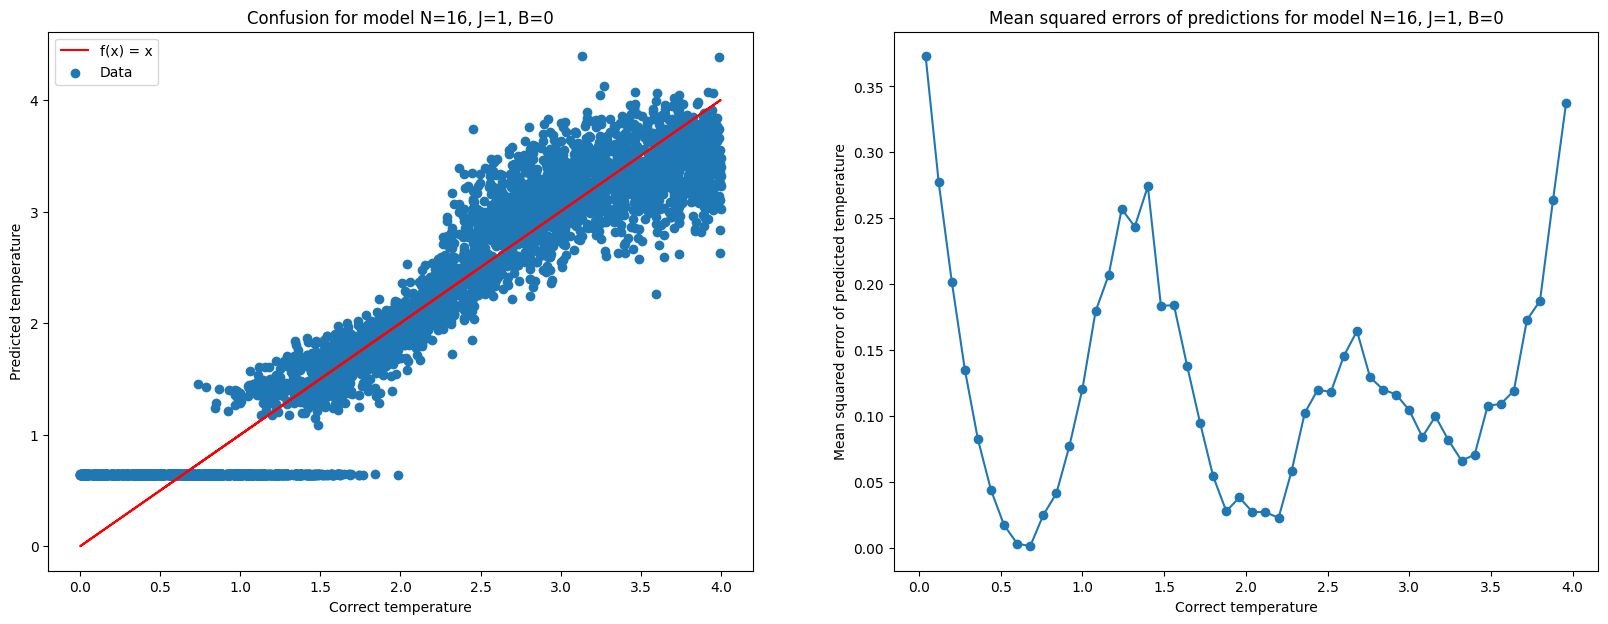

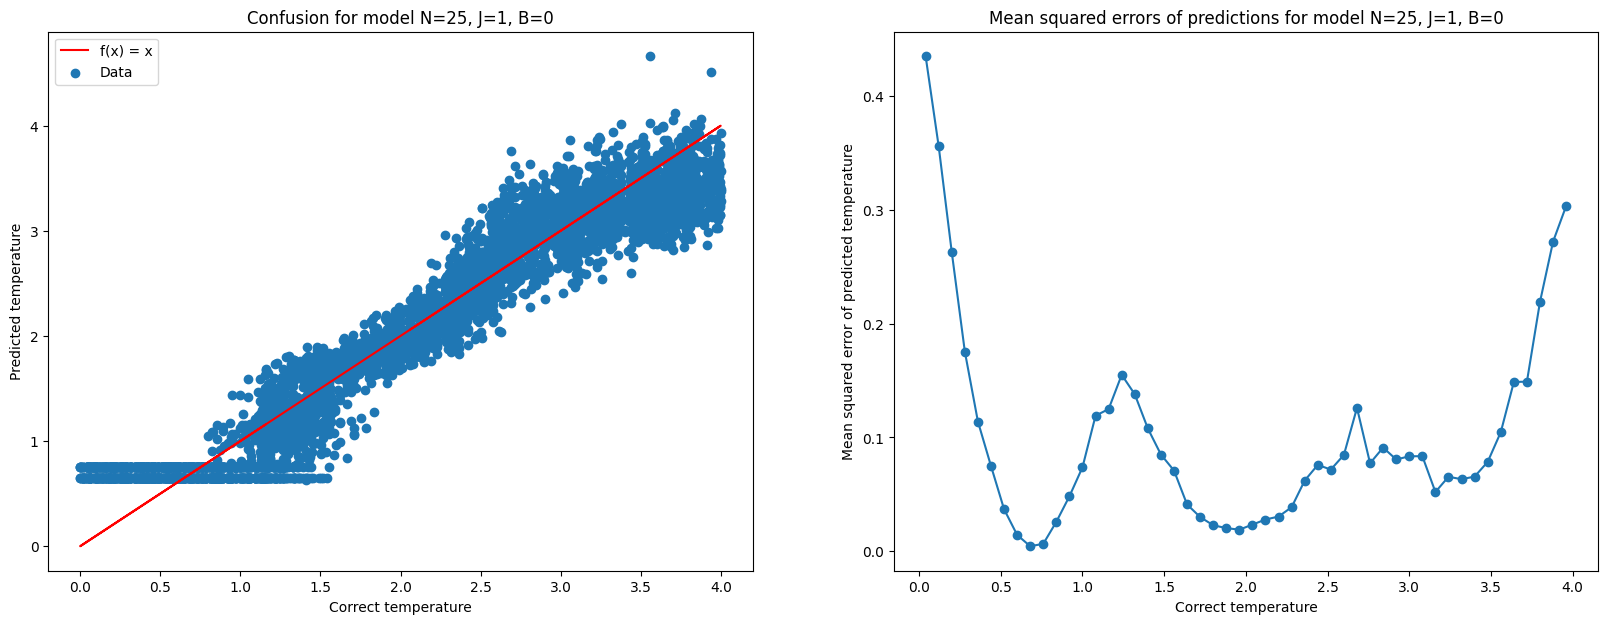

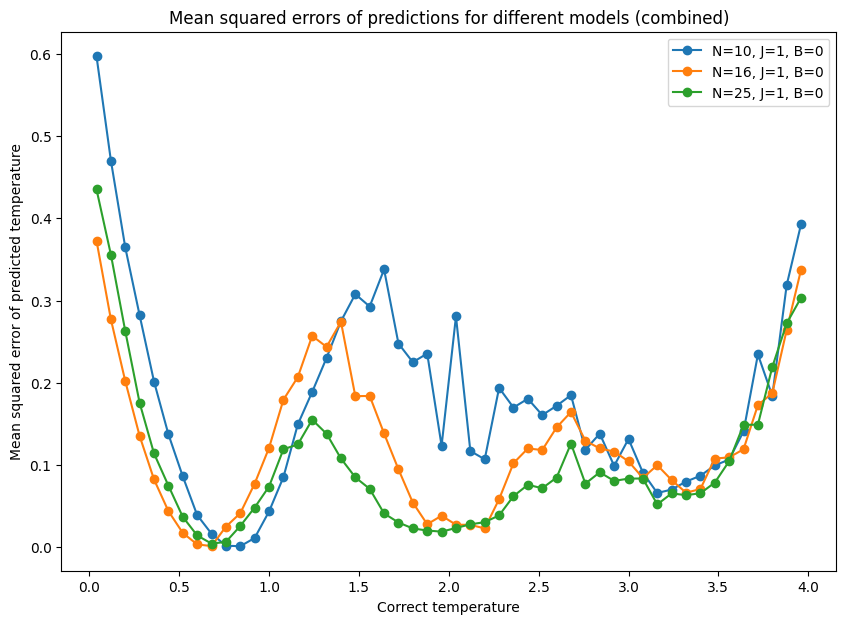

In [2]:
Ns = [10, 16, 25]
Js = [1]
Bs = [0]

bins = 50
temp_max = 4.0
temp_min = 0.0

# Prepare needed lists/parameters

files_not_found = 0
combined_errors = {}
bin_centers = np.arange(0, temp_max, (temp_max - temp_min)/bins) + (temp_max - temp_min)/(2*bins)

for N in Ns:
    for J in Js:
        for B in Bs:
            filename = f"ising_nn_models/N_{N}_J_{J}_B_{B}.csv"
            if not os.path.isfile(filename):
                files_not_found += 1
                continue

            data = np.loadtxt(filename, skiprows=1, delimiter=",")

            fig, ax = plt.subplots(1, 2, figsize=(20, 7))

            ax[0].plot(data[:, 0], data[:, 0], color="red", label="f(x) = x")
            ax[0].scatter(data[:, 0], data[:, 1], label="Data")

            ax[0].set_xlabel("Correct temperature")
            ax[0].set_ylabel("Predicted temperature")
            ax[0].set_title(f"Confusion for model N={N}, J={J}, B={B}")

            ax[0].legend()

            counts = np.zeros(bins)
            errors = np.zeros(bins)

            for temp_init, temp_pred in data:
                bin_index = int(np.floor(temp_init/((temp_max - temp_min)/bins)) if temp_init != temp_max else bins - 1)

                counts[bin_index] += 1
                errors[bin_index] += (temp_init - temp_pred)**2
            
            errors /= counts

            combined_errors[(N, J, B)] = errors

            ax[1].plot(bin_centers, errors, marker="o")

            ax[1].set_xlabel("Correct temperature")
            ax[1].set_ylabel("Mean squared error of predicted temperature")
            ax[1].set_title(f"Mean squared errors of predictions for model N={N}, J={J}, B={B}")

            plt.show()

persistent_errors["Without translational invariance training"] = (combined_errors, bin_centers)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.set_xlabel("Correct temperature")
ax.set_ylabel("Mean squared error of predicted temperature")
ax.set_title(f"Mean squared errors of predictions for different models (combined)")

for params, errors in combined_errors.items():
    ax.plot(bin_centers, errors, marker="o", label=f"N={params[0]}, J={params[1]}, B={params[2]}")

ax.legend()

plt.show()

if files_not_found:
    print(f"Warning: Not showing {files_not_found} plots because the related data was not found")

# With translational invariance training

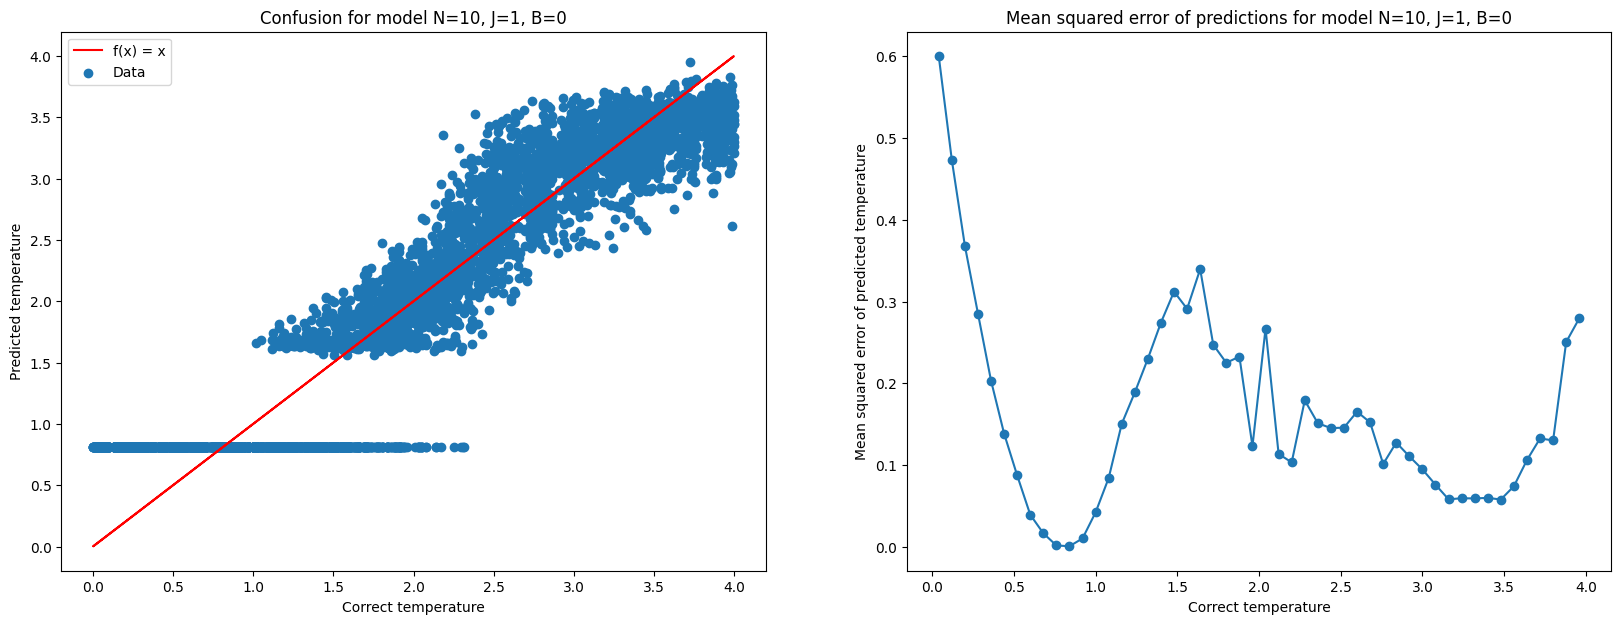

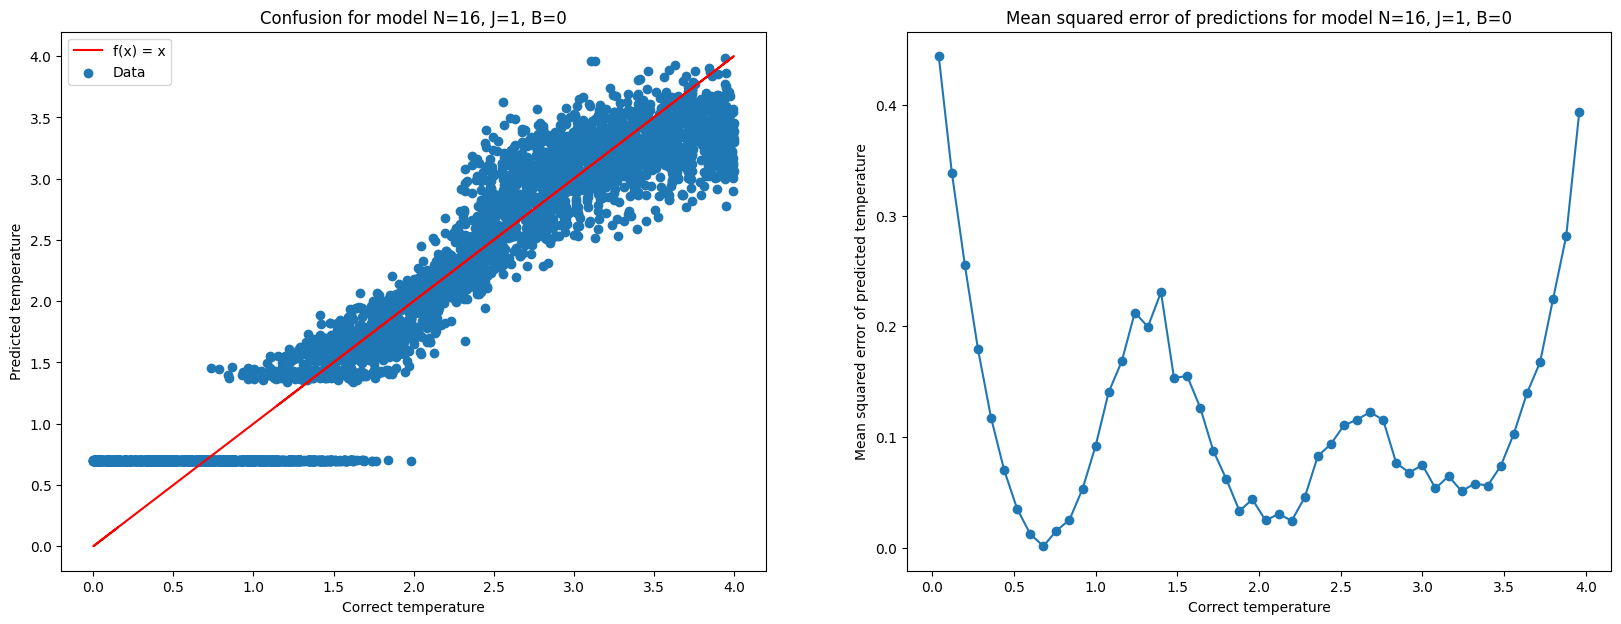

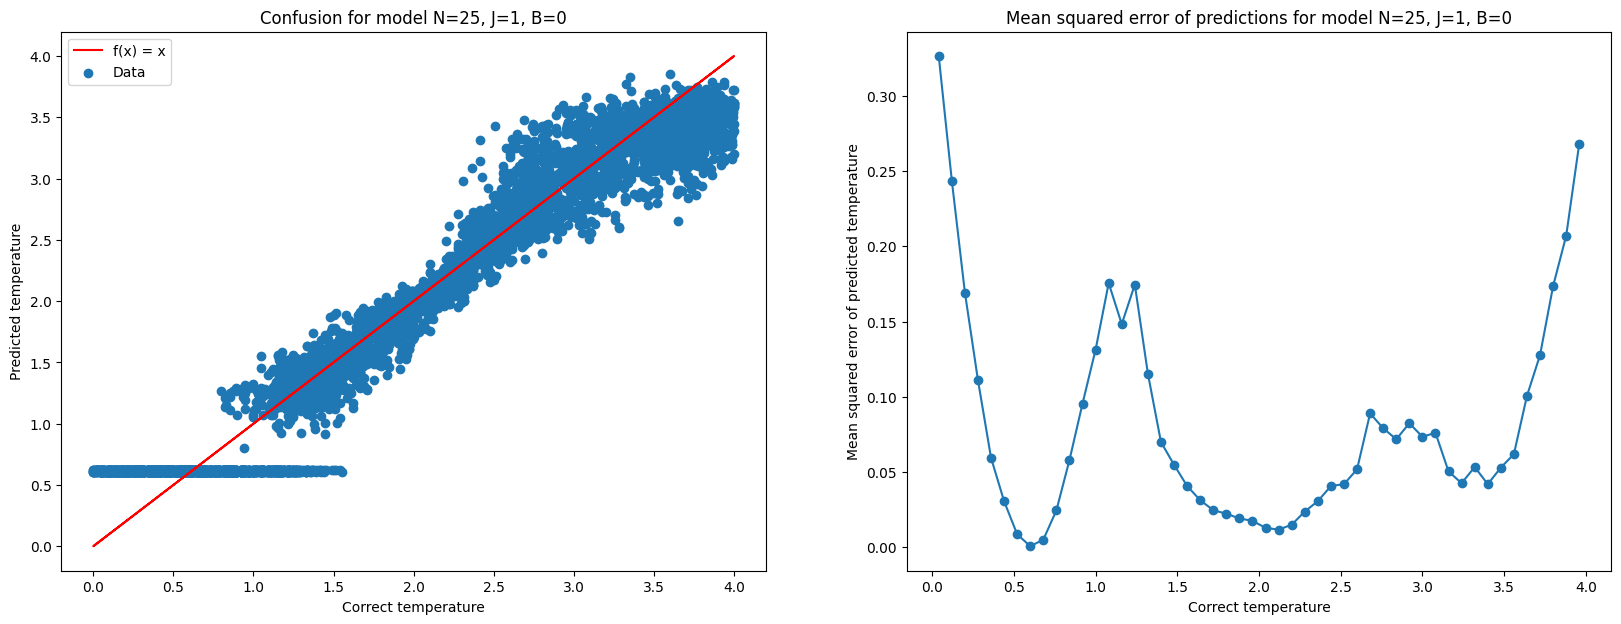

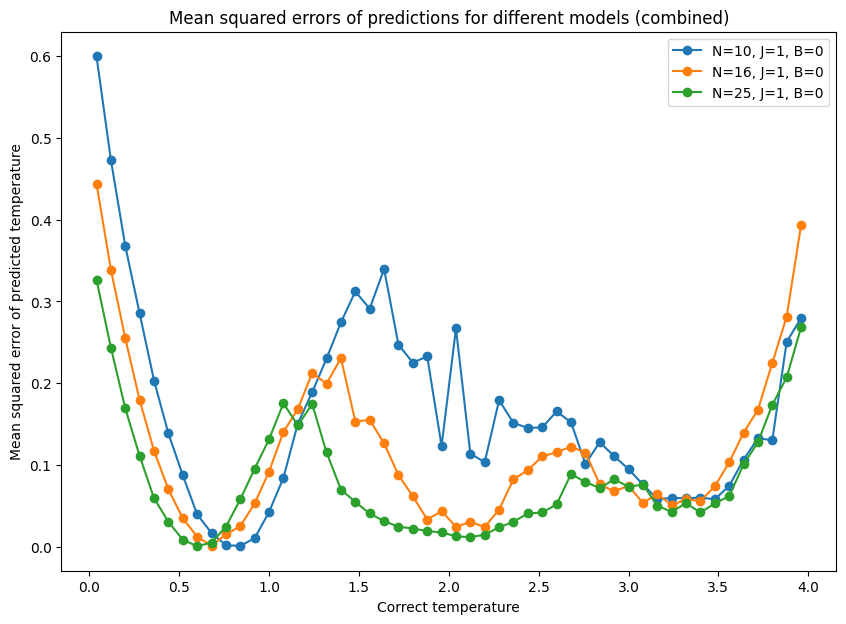

In [3]:
Ns = [10, 16, 25]
Js = [1]
Bs = [0]

bins = 50
temp_max = 4.0
temp_min = 0.0

# Prepare needed lists/parameters

files_not_found = 0
combined_errors = {}
bin_centers = np.arange(0, temp_max, (temp_max - temp_min)/bins) + (temp_max - temp_min)/(2*bins)

for N in Ns:
    for J in Js:
        for B in Bs:
            filename = f"ising_nn_models_translation/N_{N}_J_{J}_B_{B}.csv"
            if not os.path.isfile(filename):
                files_not_found += 1
                continue

            data = np.loadtxt(filename, skiprows=1, delimiter=",")

            fig, ax = plt.subplots(1, 2, figsize=(20, 7))

            ax[0].plot(data[:, 0], data[:, 0], color="red", label="f(x) = x")
            ax[0].scatter(data[:, 0], data[:, 1], label="Data")

            ax[0].set_xlabel("Correct temperature")
            ax[0].set_ylabel("Predicted temperature")
            ax[0].set_title(f"Confusion for model N={N}, J={J}, B={B}")

            ax[0].legend()

            counts = np.zeros(bins)
            errors = np.zeros(bins)

            for temp_init, temp_pred in data:
                bin_index = int(np.floor(temp_init/((temp_max - temp_min)/bins)) if temp_init != temp_max else bins - 1)

                counts[bin_index] += 1
                errors[bin_index] += (temp_init - temp_pred)**2
            
            errors /= counts

            combined_errors[(N, J, B)] = errors

            ax[1].plot(bin_centers, errors, marker="o")

            ax[1].set_xlabel("Correct temperature")
            ax[1].set_ylabel("Mean squared error of predicted temperature")
            ax[1].set_title(f"Mean squared error of predictions for model N={N}, J={J}, B={B}")

            plt.show()

persistent_errors["With translational invariance training"] = (combined_errors, bin_centers)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.set_xlabel("Correct temperature")
ax.set_ylabel("Mean squared error of predicted temperature")
ax.set_title(f"Mean squared errors of predictions for different models (combined)")

for params, errors in combined_errors.items():
    ax.plot(bin_centers, errors, marker="o", label=f"N={params[0]}, J={params[1]}, B={params[2]}")

ax.legend()

plt.show()

if files_not_found:
    print(f"Warning: Not showing {files_not_found} plots because the related data was not found")

# With preprocessing

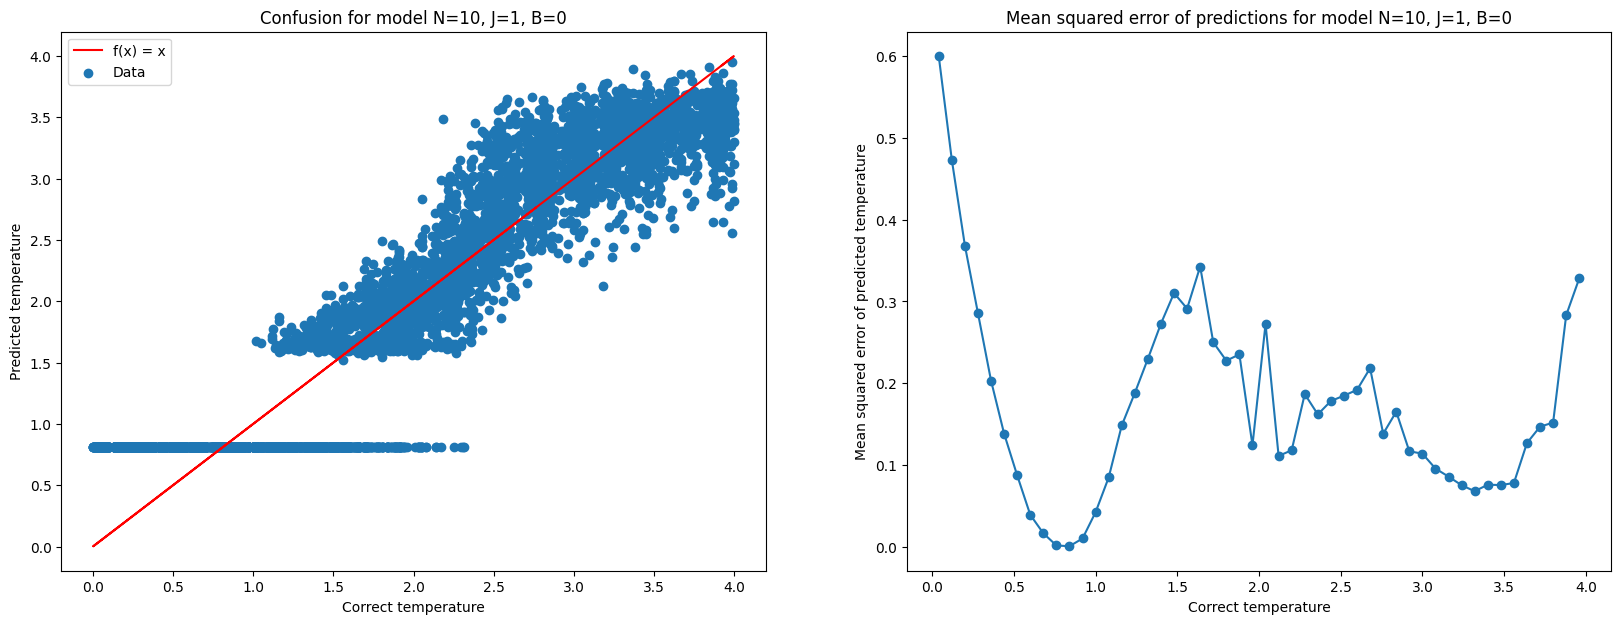

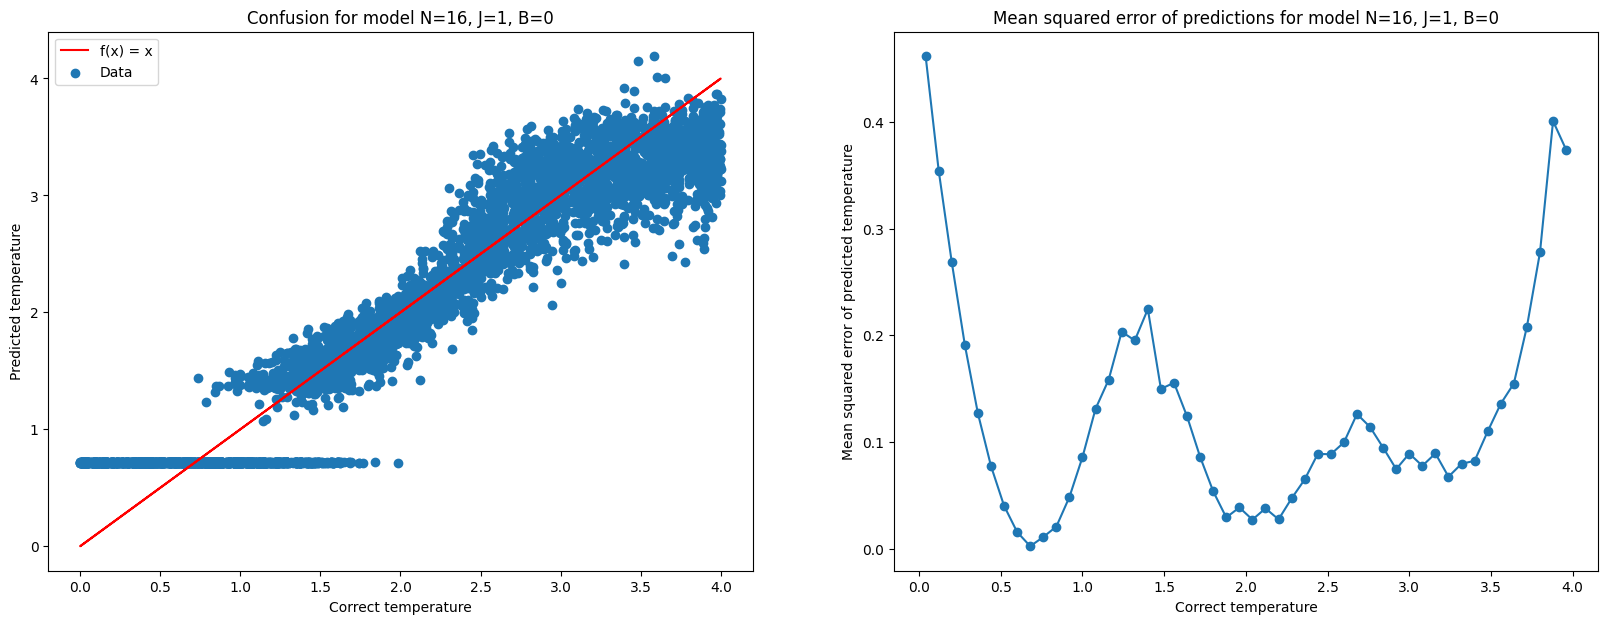

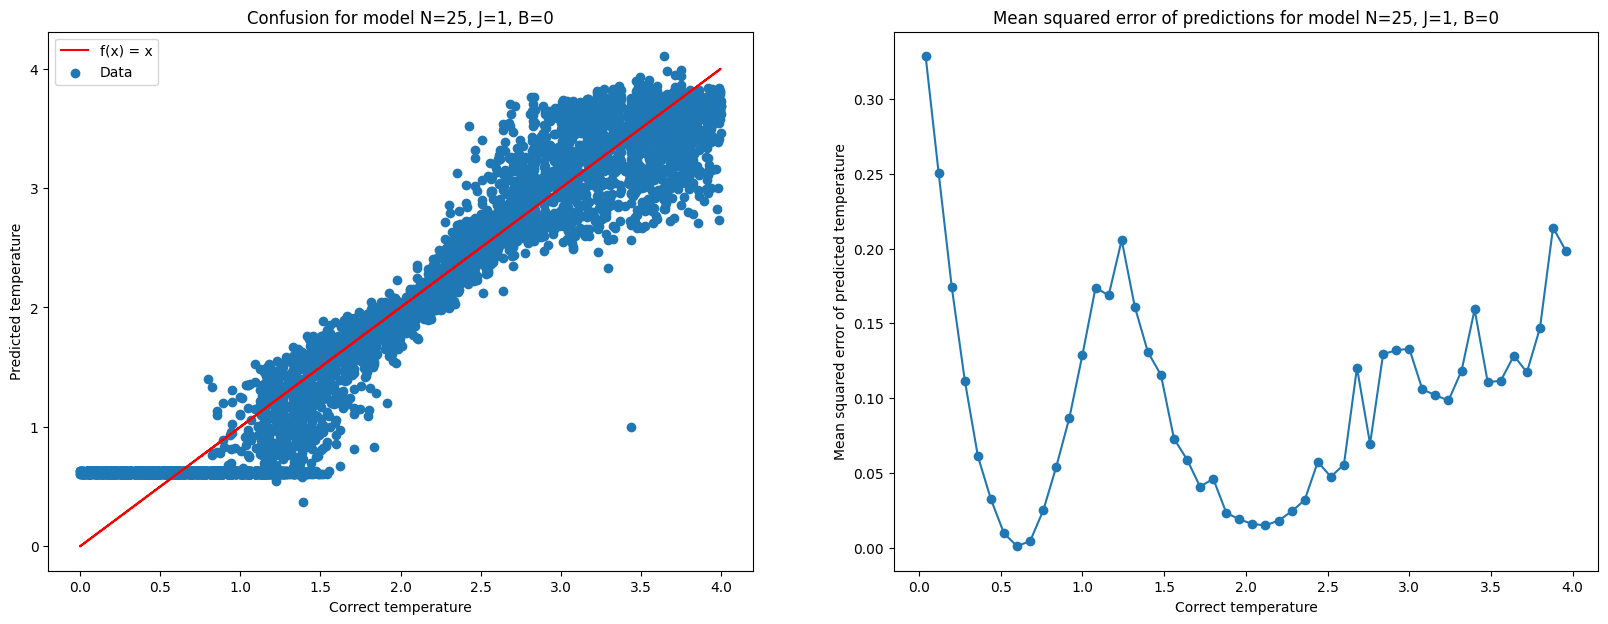

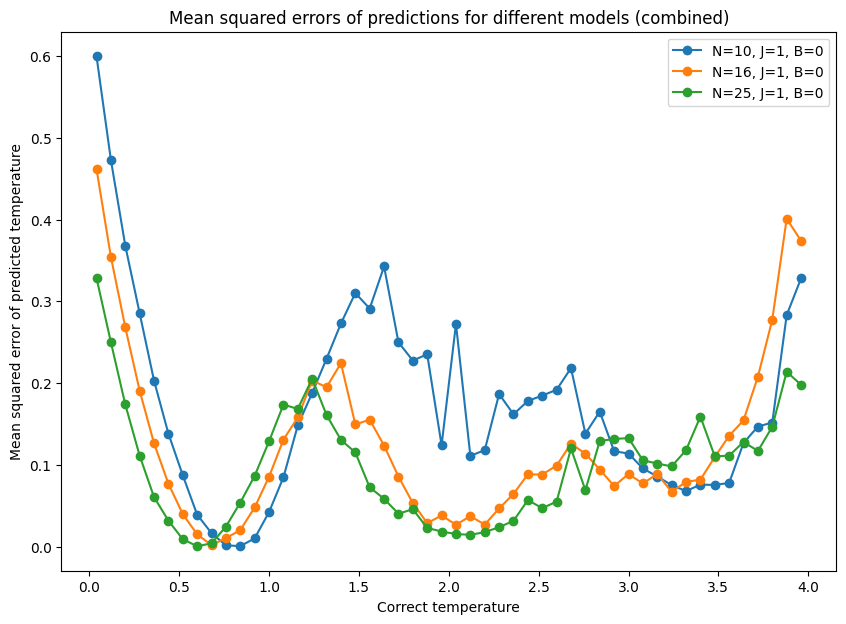

In [4]:
Ns = [10, 16, 25]
Js = [1]
Bs = [0]

bins = 50
temp_max = 4.0
temp_min = 0.0

# Prepare needed lists/parameters

files_not_found = 0
combined_errors = {}
bin_centers = np.arange(0, temp_max, (temp_max - temp_min)/bins) + (temp_max - temp_min)/(2*bins)

for N in Ns:
    for J in Js:
        for B in Bs:
            filename = f"ising_nn_models_preprocessed/N_{N}_J_{J}_B_{B}.csv"
            if not os.path.isfile(filename):
                files_not_found += 1
                continue

            data = np.loadtxt(filename, skiprows=1, delimiter=",")

            fig, ax = plt.subplots(1, 2, figsize=(20, 7))

            ax[0].plot(data[:, 0], data[:, 0], color="red", label="f(x) = x")
            ax[0].scatter(data[:, 0], data[:, 1], label="Data")

            ax[0].set_xlabel("Correct temperature")
            ax[0].set_ylabel("Predicted temperature")
            ax[0].set_title(f"Confusion for model N={N}, J={J}, B={B}")

            ax[0].legend()

            counts = np.zeros(bins)
            errors = np.zeros(bins)

            for temp_init, temp_pred in data:
                bin_index = int(np.floor(temp_init/((temp_max - temp_min)/bins)) if temp_init != temp_max else bins - 1)

                counts[bin_index] += 1
                errors[bin_index] += (temp_init - temp_pred)**2
            
            errors /= counts

            combined_errors[(N, J, B)] = errors

            ax[1].plot(bin_centers, errors, marker="o")

            ax[1].set_xlabel("Correct temperature")
            ax[1].set_ylabel("Mean squared error of predicted temperature")
            ax[1].set_title(f"Mean squared error of predictions for model N={N}, J={J}, B={B}")

            plt.show()

persistent_errors["With preprocessing"] = (combined_errors, bin_centers)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.set_xlabel("Correct temperature")
ax.set_ylabel("Mean squared error of predicted temperature")
ax.set_title(f"Mean squared errors of predictions for different models (combined)")

for params, errors in combined_errors.items():
    ax.plot(bin_centers, errors, marker="o", label=f"N={params[0]}, J={params[1]}, B={params[2]}")

ax.legend()

plt.show()

if files_not_found:
    print(f"Warning: Not showing {files_not_found} plots because the related data was not found")

# Reduced temperature range

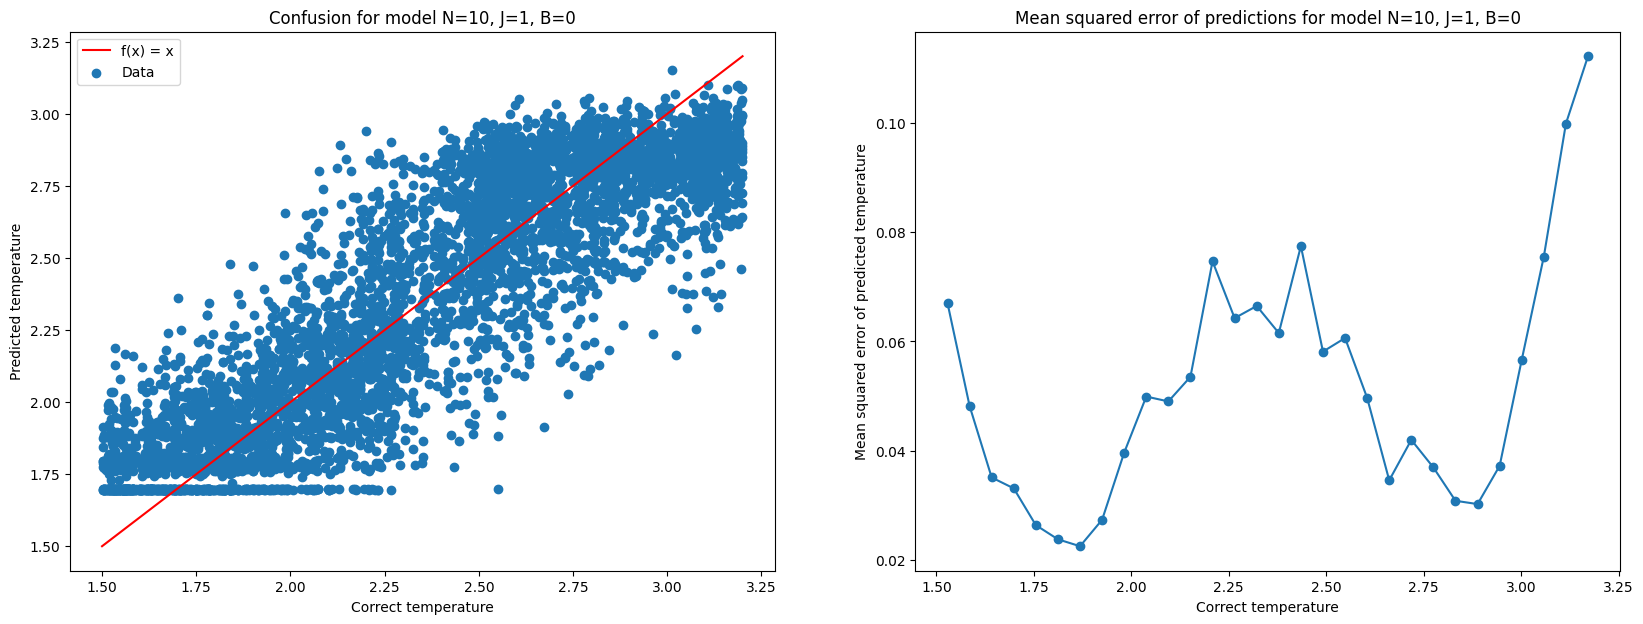

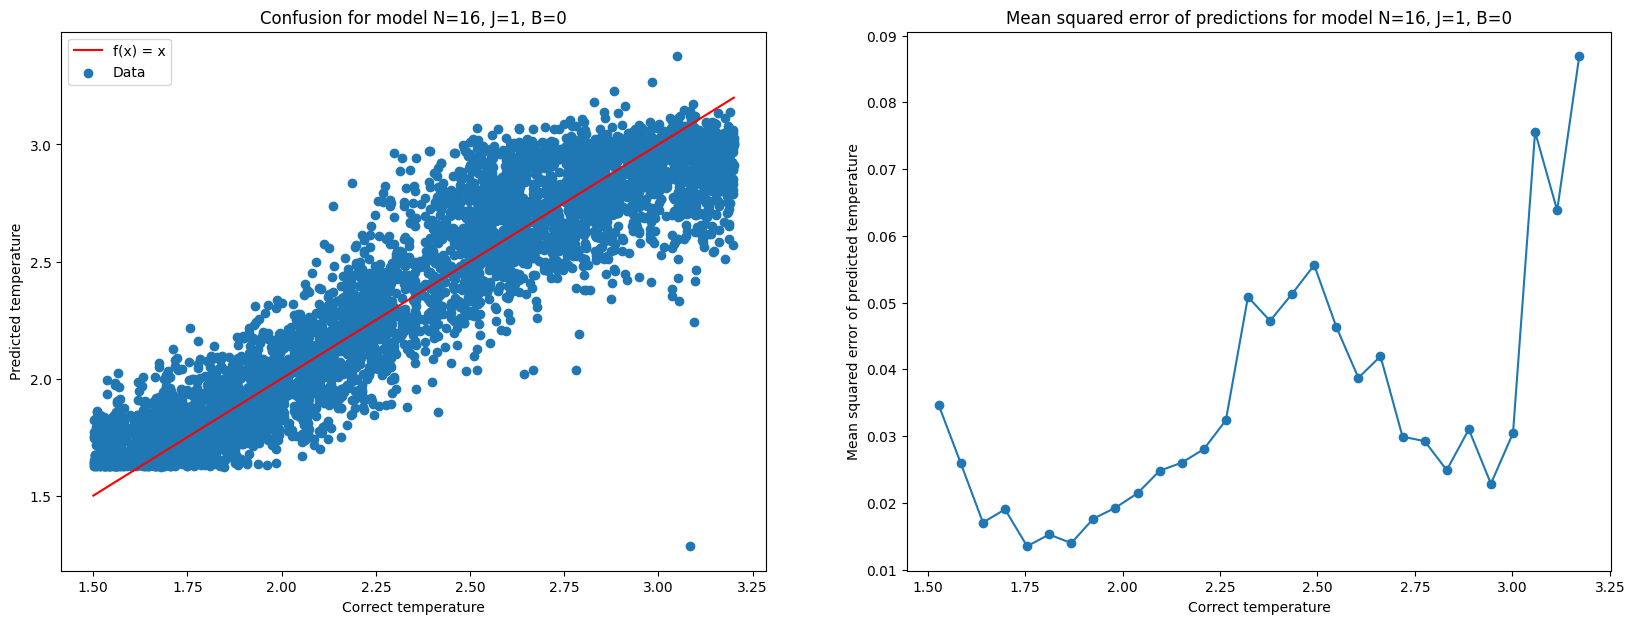

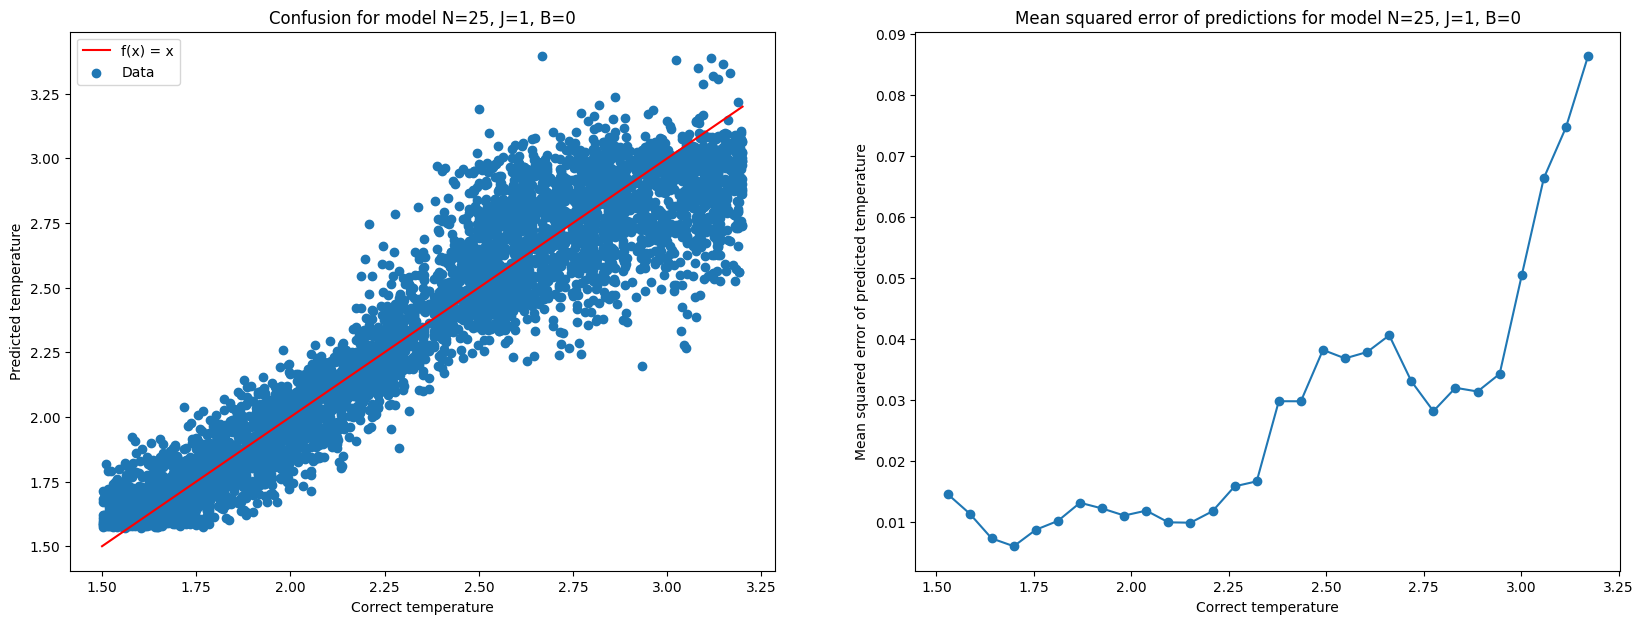

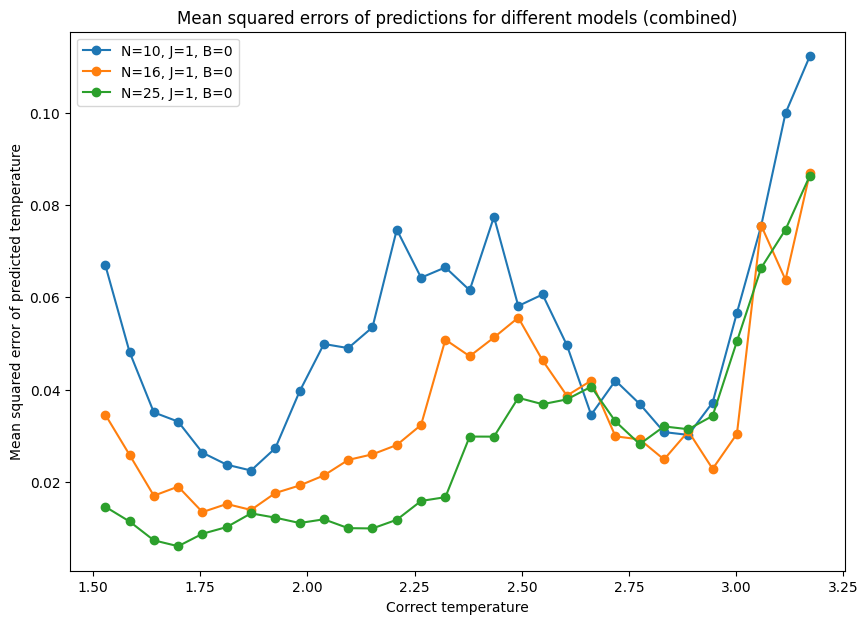

In [15]:
Ns = [10, 16, 25]
Js = [1]
Bs = [0]

bins = 30
temp_max = 3.2
temp_min = 1.5

# Prepare needed lists/parameters

files_not_found = 0
combined_errors = {}
bin_centers = np.arange(temp_min, temp_max, (temp_max - temp_min)/bins) + (temp_max - temp_min)/(2*bins)

for N in Ns:
    for J in Js:
        for B in Bs:
            filename = f"ising_nn_models_reduced/N_{N}_J_{J}_B_{B}.csv"
            if not os.path.isfile(filename):
                files_not_found += 1
                continue

            data = np.loadtxt(filename, skiprows=1, delimiter=",")

            fig, ax = plt.subplots(1, 2, figsize=(20, 7))

            ax[0].plot([temp_min, temp_max], [temp_min, temp_max], color="red", label="f(x) = x")
            ax[0].scatter(data[:, 0], data[:, 1], label="Data")

            ax[0].set_xlabel("Correct temperature")
            ax[0].set_ylabel("Predicted temperature")
            ax[0].set_title(f"Confusion for model N={N}, J={J}, B={B}")

            ax[0].legend()

            counts = np.zeros(bins)
            errors = np.zeros(bins)

            for temp_init, temp_pred in data:
                bin_index = int(np.floor((temp_init - temp_min)/((temp_max - temp_min)/bins)) if temp_init != temp_max else bins - 1)

                counts[bin_index] += 1
                errors[bin_index] += (temp_init - temp_pred)**2
            
            errors /= counts

            combined_errors[(N, J, B)] = errors

            ax[1].plot(bin_centers, errors, marker="o")

            ax[1].set_xlabel("Correct temperature")
            ax[1].set_ylabel("Mean squared error of predicted temperature")
            ax[1].set_title(f"Mean squared error of predictions for model N={N}, J={J}, B={B}")

            plt.show()

persistent_errors["With preprocessing and reduced temperature range"] = (combined_errors, bin_centers)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.set_xlabel("Correct temperature")
ax.set_ylabel("Mean squared error of predicted temperature")
ax.set_title(f"Mean squared errors of predictions for different models (combined)")

for params, errors in combined_errors.items():
    ax.plot(bin_centers, errors, marker="o", label=f"N={params[0]}, J={params[1]}, B={params[2]}")

ax.legend()

plt.show()

if files_not_found:
    print(f"Warning: Not showing {files_not_found} plots because the related data was not found")

# Comparative error plots

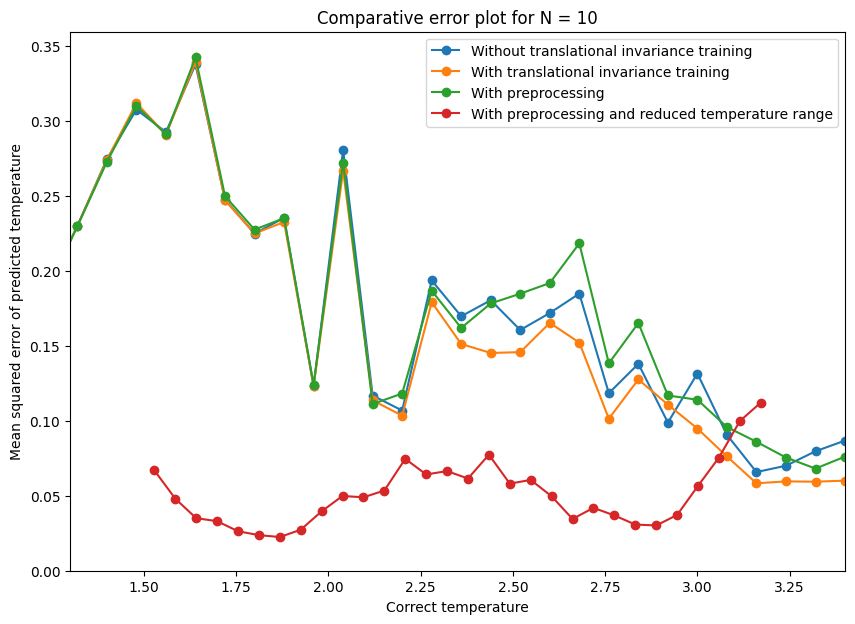

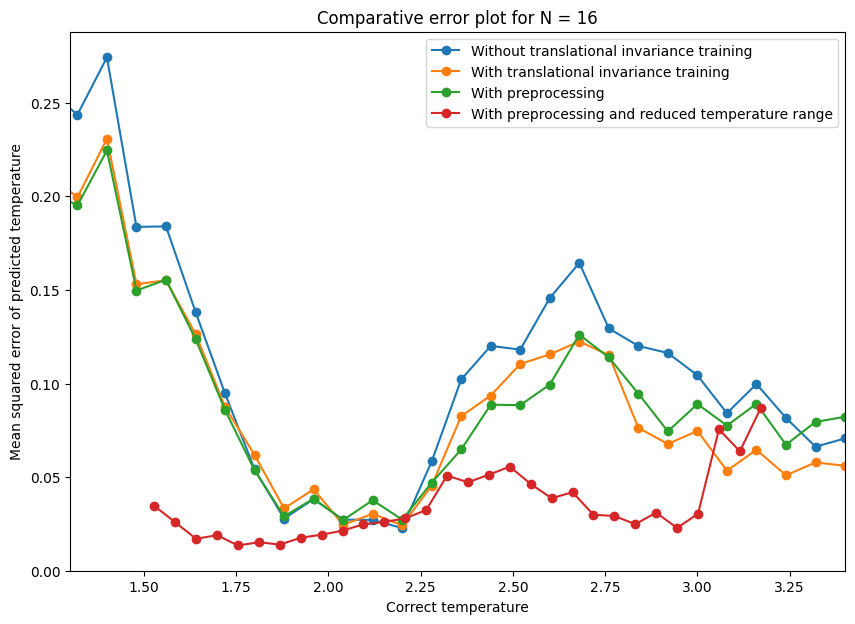

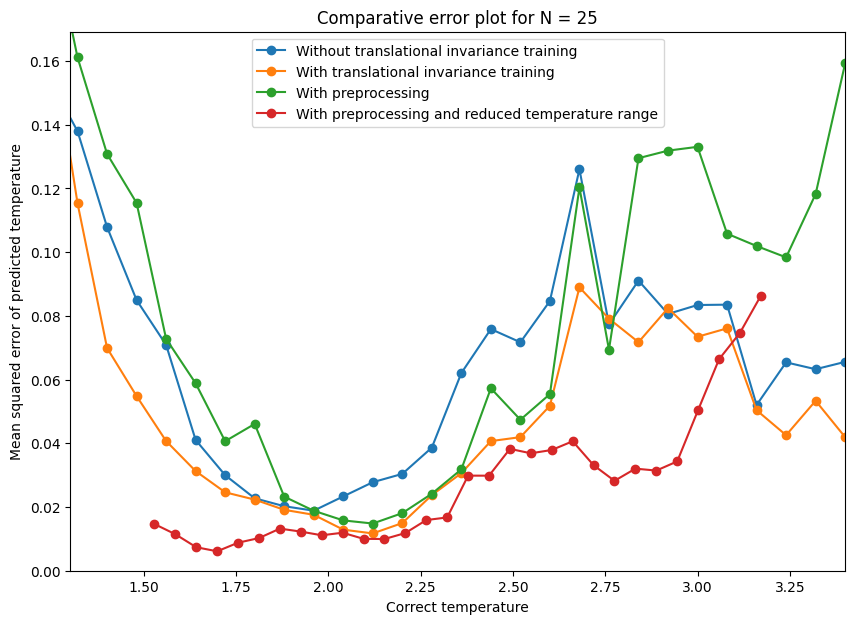

In [14]:
Ns = []
for combined_errors, bins in persistent_errors.values():
    for params in combined_errors.keys():
        if params[0] not in Ns:
            Ns.append(params[0])
Ns.sort()

xlim = (1.3, 3.4)

for N in Ns:
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))

    ax.set_title(f"Comparative error plot for N = {N}")
    ax.set_xlabel("Correct temperature")
    ax.set_ylabel("Mean squared error of predicted temperature")
    max_y = 0
    for description, persistent_errors_values in persistent_errors.items():
        combined_errors, bin_centers = persistent_errors_values
        for params, errors in combined_errors.items():
            if params[0] == N:
                ax.plot(bin_centers, errors, marker="o", label=description)
                max_error = np.max(np.where(np.logical_and(bin_centers >= xlim[0], bin_centers <= xlim[1]), errors, 0))
                max_y = max_error if max_error > max_y else max_y
    ax.set_xlim(xlim)
    ax.set_ylim((0, max_y*1.05))
    ax.legend()
    plt.show()